# PHAS0030 Assignment Week 8
## 21018836 Pat Xua Tan
In this section, we will explore the Isling Model using Monte-Carlo Method where instead of flipping the sign of the spin we perform a switch between neighbouring spins which tends toward a minimisation of energy.


In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

### 1. Set up the initial arrangements of spins

This can be taken from the in-class work; plot to check

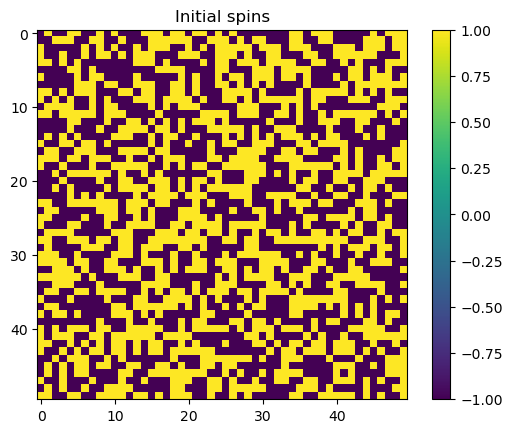

In [2]:
boxlen = 50
B_over_kT = 0.0
J_over_kT = 0.5
spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen))

plt.imshow(spins)
plt.title('Initial spins')
plt.colorbar()

### 2. Calculate the energy

In [3]:
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
print("Starting energy is ",etot)

Starting energy is  -116.0


### 3. Write the swap function



In [4]:
def update_swap(i1,j1,i2,j2):
    """Docstring"""
    i1m1 = (i1-1)%boxlen
    i1p1 = (i1+1)%boxlen
    j1m1 = (j1-1)%boxlen
    j1p1 = (j1+1)%boxlen
    sum_neigh_spins1 = spins[i1m1,j1] + spins[i1p1,j1] + spins[i1,j1m1] + spins [i1,j1p1] 
    i2m1 = (i2-1)%boxlen
    i2p1 = (i2+1)%boxlen
    j2m1 = (j2-1)%boxlen
    j2p1 = (j2+1)%boxlen
    sum_neigh_spins2 = spins[i2m1,j2] + spins[i2p1,j2] + spins[i2,j2m1] + spins [i2,j2p1]
    diff_spins = sum_neigh_spins1 - sum_neigh_spins2
    # The change in energy ...
    de = J_over_kT*(diff_spins)
    p = np.exp(-de)
    if de<0 or de<p:
        # Swap spins
        spins[i1,j1]=spins[i2,j2]
        spins[i2,j2]=spins[i1,j1]

    else:
        de = 0.0
    return de



### 4. Run the simulation

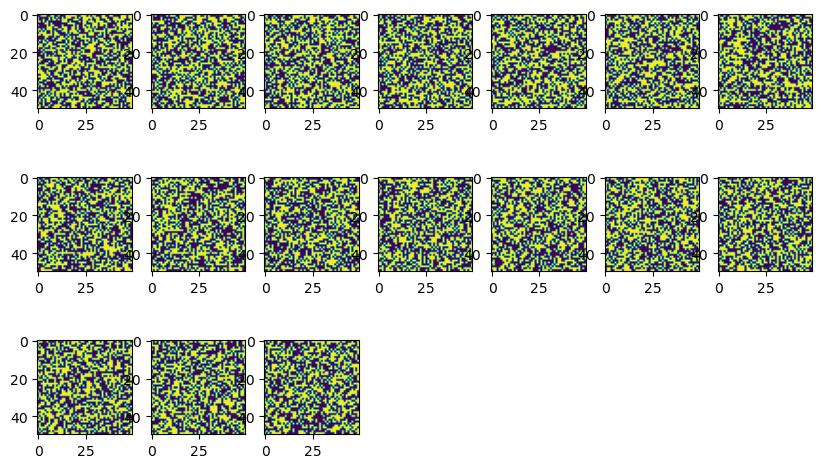

In [5]:
Nsteps = 50000
etot = np.zeros(Nsteps+1)
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))

figIsing = plt.figure(figsize=(10,6))
index = 1
for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = rng.integers(boxlen, size=2)
    this_i2, this_j2 = rng.integers(boxlen,size=2)
    de = update_swap(this_i1,this_j1,this_i2,this_j2)
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                       np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    
    if i%3000==0:
        ax = figIsing.add_subplot(3,7,index)
        ax.imshow(spins)
        index +=1 
        
        
        


### 5. Show total energy


Text(0.5, 1.0, 'Total energy')

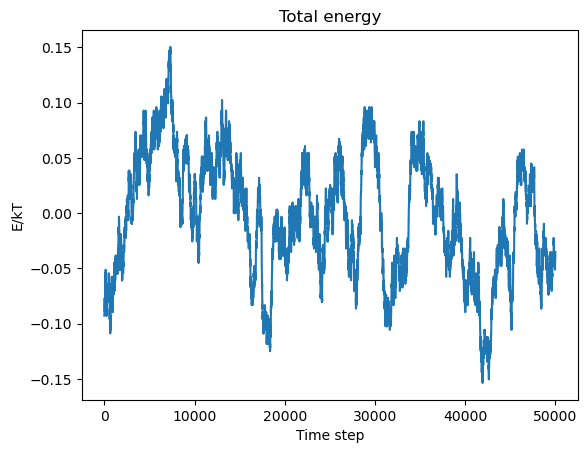

In [6]:
Time = np.linspace(0,Nsteps,Nsteps+1)
Normalised_etot= ( etot/ (len(spins)**2 *J_over_kT))
plt.plot( Time , Normalised_etot ) 
plt.xlabel('Time step')
plt.ylabel('E/kT')
plt.title('Total energy')

## Re-run the Simulation with J_over_kT =1

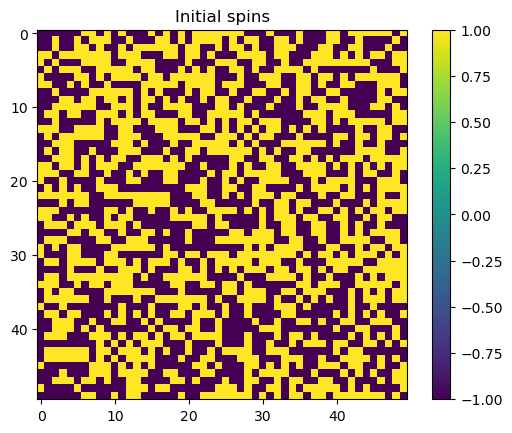

In [7]:
J_over_kT = 1
# Repeat simulation
boxlen = 50
B_over_kT = 0.0

spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen))

plt.imshow(spins)
plt.title('Initial spins')
plt.colorbar()

Starting energy is  -24.0


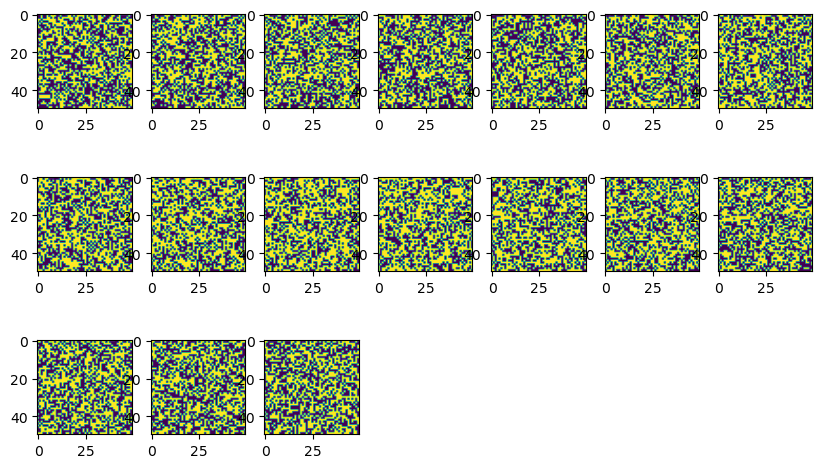

In [8]:
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
print("Starting energy is ",etot)
Nsteps = 50000
etot = np.zeros(Nsteps+1)
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))

figIsing = plt.figure(figsize=(10,6))
index = 1
for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = rng.integers(boxlen, size=2)
    this_i2, this_j2 = rng.integers(boxlen,size=2)
    de = update_swap(this_i1,this_j1,this_i2,this_j2)
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                       np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    
    if i%3000==0:
        ax = figIsing.add_subplot(3,7,index)
        ax.imshow(spins)
        index +=1 
        
        
        

Text(0.5, 1.0, 'Total energy')

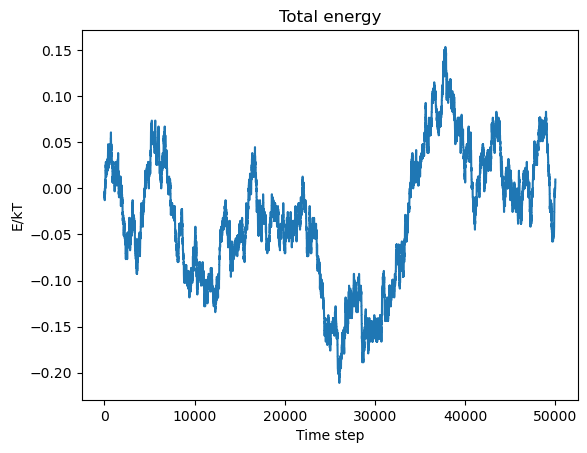

In [9]:
Time = np.linspace(0,Nsteps,Nsteps+1)
Normalised_etot= ( etot/ (len(spins)**2 *J_over_kT))
plt.plot( Time , Normalised_etot ) 
plt.xlabel('Time step')
plt.ylabel('E/kT')
plt.title('Total energy')

## Conclusion


In comparison of the two different value of J_over_kT, we see that the higher the value of J_over_kT the more effective our approach becomes as the higher value J_over_kT's Total energy plot reaches a minimum faster than the total energy plot from a lower value of J_over_kT. So the approach of switching neighbouring spins are more effective for higher value J_over_kT which corresponds to strong coupling between neighbouring spins.